In [1]:
import pandas as pd
import numpy as np

In [2]:
#def rename_columns(path = "data/cifar10_cons.csv"):
def OSL_data_old(path = "data/exp2/IMDBtoken_pos2_val.csv"):
   df = pd.read_csv(path)
   df = df.drop(["Step"], axis='columns')
   print(df.shape)
   min_max = [col for col in list(df.columns) if "MIN" in col or "MAX" in col]
   df = df.drop(min_max, axis='columns')
   print(df.shape)

   not_all = [col for col in list(df.columns) if "\'first\'" in col or "\'everyother\'"  in col]
   not_all2 = [col for col in list(df.columns) if "mam" not in col.lower()]
   not_all = not_all + not_all2
   print("EXCLUDED", not_all)
   df = df.drop(not_all, axis='columns')
   df = df.dropna(axis = "columns")
   df = df.rename(columns={name: name.lower()[:-11] for name in list(df.columns)})
   # if "IMDB" in path:
   #    df = df.drop("mambamodel_s6", axis='columns')

   imdb = True if "IMDB" in path else False
   vars = ["diag","10000", "1024", "true"]
   bonus_vars = ["b", "c", "dt", "x"]
   final_vars = ["nopos", "imdb","acc"]
   all_vars = vars + bonus_vars + final_vars
   num_vars = len(all_vars)
   old_names = list(df.columns)


   binary_data = np.zeros((len(df.columns), num_vars))
   for name_dix, name in enumerate(old_names):
      for var_idx, var in enumerate(vars):
         if var in name:
            binary_data[name_dix, var_idx] = 1.

         # get b,c,dt,x for s6
         if "s6" in name and "[" in name:
            subset = name.split(" ")[-1]
            for var_idx2, var in enumerate(bonus_vars):
               if var in subset:
                  binary_data[name_dix, len(vars) + var_idx2] = 1.

      # get acc and dataset
      acc = df[name].values[-1]
      binary_data[name_dix, -1] = acc
      if imdb:
         binary_data[name_dix, -2] = 1.

      if len(name.split(" ")) < 3 or not " " in name:
         binary_data[name_dix, -3] = 1.

   return binary_data, all_vars

imdb_ols_data, all_vars = OSL_data_old(path="data/exp2/IMDBtoken_pos2_val_OLD.csv")
# imdb_ols_data, all_vars = OSL_data(path="data/exp2/IMDBtoken_pos2_val.csv")
# cifar10_ols_data, _ = OSL_data(path = "data/exp2/CIFAR10cons_pos2_val.csv")

(15, 117)
(15, 39)
EXCLUDED ['S4ClassicModel_diag - test acc', "S4ClassicModel_diag_['all', 10000, None, False] - test acc", "S4ClassicModel_diag_['all', 10000, None, True] - test acc", "S4ClassicModel_diag_['all', 10000, 1024, False] - test acc", "S4ClassicModel_diag_['all', 10000, 1024, True] - test acc", "S4ClassicModel_diag_['all', 10, None, False] - test acc", "S4ClassicModel_diag_['all', 10, None, True] - test acc", "S4ClassicModel_diag_['all', 10, 1024, False] - test acc", "S4ClassicModel_diag_['all', 10, 1024, True] - test acc"]
mambamodel_diag_['all', 10000, none, false]
mambamodel_diag_['all', 10000, none, true]
mambamodel_s6
mambamodel_diag_['all', 10000, 1024, false]
mambamodel_diag_['all', 10000, 1024, true]
mambamodel_diag_['all', 10, none, false]
mambamodel_diag_['all', 10, none, true]
mambamodel_diag
mambamodel_diag_['all', 10, 1024, false]
mambamodel_diag_['all', 10, 1024, true]
mambamodel s6['all', 10000, 1024, true, 'b_c_dt_x']
mambamodel s6['all', 10000, 1024, false

In [3]:
# #def rename_columns(path = "data/cifar10_cons.csv"):
# import pandas as pd
# import numpy as np
# def OSL_data(path="data/exp2/IMDBtoken_pos2_val.csv", test_or_val = "test"):
#    #"test acc","train acc","val acc"
#    df = pd.read_csv(path)
#    print(df.shape)
# 
#    names = list(df["Name"])
# 
#    not_all = [idx for idx, name in enumerate(names) if "\'first\'" in name or "\'everyother\'" in name]
#    print("not all", not_all)
#    assert len(not_all) == 0, "there are fist and everyother"
# 
#    df = df[df.State == "finished"]
#    # df = df.rename(columns={name: name.lower()[:-11] for name in list(df.columns)})
# 
#    names = [name.lower() for name in list(df["Name"])]
#    imdb = True if "IMDB" in path else False
#    vars = ["mamba", "diag", "10000", "1024", "true"]
#    bonus_vars = ["b", "c", "dt", "x"]
#    final_vars = ["imdb", "acc"]
#    all_vars = vars + bonus_vars + final_vars
#    num_vars = len(all_vars)
#    # old_names = list(df.columns)
# 
#    binary_data = np.zeros((len(names), num_vars))
#    for name_dix, name in enumerate(names):
#       for var_idx, var in enumerate(vars):
#          if var in name:
#             binary_data[name_dix, var_idx] = 1.
# 
#          # get b,c,dt,x for s6
#          if "s6" in name and "[" in name:
#             subset = name.split(" ")[-1]
#             for var_idx2, var in enumerate(bonus_vars):
#                if var in subset:
#                   binary_data[name_dix, len(vars) + var_idx2] = 1.
# 
#       # get acc and dataset
#       acc = df[test_or_val+" acc"].values[-1]
#       binary_data[name_dix, -1] = acc
#       if imdb:
#          binary_data[name_dix, -2] = 1.
# 
#       # if len(name.split(" ")) < 3 or not " " in name:
#       #    binary_data[name_dix, -3] = 1.
# 
#    return binary_data, all_vars
# 
# 
# imdb_ols_data, all_vars = OSL_data(path="data/exp2/IMDBtoken_pos2_val.csv")
# cifar10_ols_data, _ = OSL_data(path = "data/exp2/CIFAR10cons_pos2_val.csv")
# 


In [4]:
# imdb_ols_data, all_vars = OSL_data_old(path="data/exp2/IMDBtoken_pos2_val_OLD.csv")
# cifar10_ols_data, _ = OSL_data_old(path = "data/exp2/CIFAR10cons_pos2_val_OLD.csv")
# print(all_vars)

In [5]:
#print(list(zip(all_vars, imdb_ols_data.mean(axis=0))))

imdb_ols_data, all_vars = OSL_data_old(path="data/exp2/IMDBtoken_pos2_val_NEW.csv")
cifar10_ols_data, _ = OSL_data_old(path ="data/exp2/CIFAR10cons_pos2_val_NEW.csv")


print("cifar", cifar10_ols_data.mean(axis=0).round(2))
print("imdb", imdb_ols_data.mean(axis=0).round(2))
combined = np.vstack((cifar10_ols_data, imdb_ols_data))

print("IMDB avg with pos", combined[(combined[:,8]==0) * (combined[:,9]==1), -1].mean())
print("IMBD avg no pos", combined[(combined[:,8]==1) * (combined[:,9]==1), -1].mean())

print("Cifar10 avg with pos", combined[(combined[:,8]==0) * (combined[:,9]==0), -1].mean())
print("Cifar10 avg no pos", combined[(combined[:,8]==1) * (combined[:,9]==0), -1].mean())



print(all_vars)
print("combined", combined.mean(axis=0).round(2))
print("combined shape:", combined.shape)
#print(cifar10_ols_data.round(2))

(15, 138)
(15, 46)
EXCLUDED ['S4ClassicModel_diag - test acc', "S4ClassicModel_diag_['all', 10000, None, False] - test acc", "S4ClassicModel_diag_['all', 10000, None, True] - test acc", "S4ClassicModel_diag_['all', 10000, 1024, False] - test acc", "S4ClassicModel_diag_['all', 10000, 1024, True] - test acc", "S4ClassicModel_diag_['all', 10, None, False] - test acc", "S4ClassicModel_diag_['all', 10, None, True] - test acc", "S4ClassicModel_diag_['all', 10, 1024, False] - test acc", "S4ClassicModel_diag_['all', 10, 1024, True] - test acc"]
mambamodel_diag1
mambamodel_diag2
mambamodel_diag3
mambamodel_diag4
mambamodel_s68
mambamodel_s65
mambamodel_s66
mambamodel_s67
mambamodel_diag_['all', 10000, none, false]
mambamodel_diag_['all', 10000, none, true]
mambamodel_s61
mambamodel_diag_['all', 10000, 1024, false]
mambamodel_diag_['all', 10000, 1024, true]
mambamodel_diag_['all', 10, none, false]
mambamodel_diag_['all', 10, none, true]
mambamodel_diag_['all', 10, 1024, false]
mambamodel_diag8
m

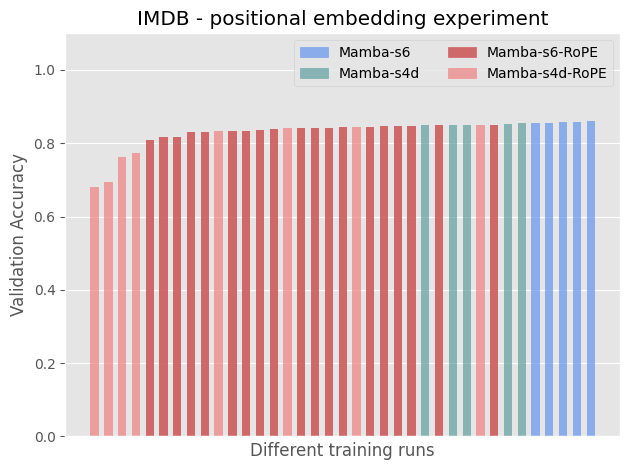

[('diagnopos', 0.852, 0.0021), ('diagpos', 0.846, 0.0036), ('s6nopos', 0.858, 0.0013), ('s6pos', 0.848, 0.0014)]


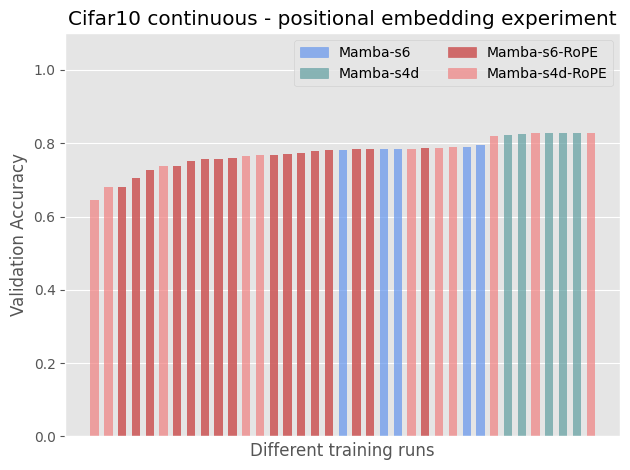

[('diagnopos', 0.827, 0.0016), ('diagpos', 0.811, 0.0163), ('s6nopos', 0.787, 0.004), ('s6pos', 0.782, 0.0023)]


In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import collections
plt.style.use("ggplot")
def plot_all_runs(arr, IMDB=True, skip_first=10):
   sort_idx = arr[:,-1].argsort()
   arr = arr[sort_idx,:]
   acc_dict = {
               "diagnopos":collections.deque(maxlen=5),
               "diagpos":collections.deque(maxlen=5),
               "s6nopos":collections.deque(maxlen=5),
               "s6pos":collections.deque(maxlen=5),
               }
   for i in range(arr.shape[0]):
      
      # diag and no pos
      if arr[i, 0] == 1 and arr[i, -3] == 1:
         c = "cadetblue"
         if i> skip_first:
            acc_dict["diagnopos"].append(arr[i, -1])
         
      #diag and pos
      elif arr[i, 0] == 1 and arr[i, -3] == 0:
         c = "lightcoral"
         if i> skip_first:
            acc_dict["diagpos"].append(arr[i, -1])
         
      # s6 and no pos
      elif arr[i, 0] == 0 and arr[i, -3] == 1:
         c = "cornflowerblue"
         if i> skip_first:
            acc_dict["s6nopos"].append(arr[i, -1])
         
      #s6 and pos
      elif arr[i, 0] == 0 and arr[i, -3] == 0:
         c = "indianred"
         if i> skip_first:
            acc_dict["s6pos"].append(arr[i, -1])
      
      else:
         raise Exception
      alpha=0.7 
      if c =="indianred":
         alpha = 0.9

      plt.bar(i, arr[i, -1], color=c, alpha=alpha, width=0.6)
   plt.ylim(0, 1.1)
   plt.xticks([],[])
   red_patch = [
           mpatches.Patch(color='cornflowerblue', label='Mamba-s6', alpha=0.7),
           mpatches.Patch(color='cadetblue', label='Mamba-s4d', alpha=0.7),
           mpatches.Patch(color='indianred', label='Mamba-s6-RoPE', alpha=0.9),
           mpatches.Patch(color='lightcoral', label='Mamba-s4d-RoPE', alpha=0.7),
           ]
   plt.legend(handles=red_patch, ncol=2)
   plt.ylabel("Validation Accuracy")
   plt.xlabel("Different training runs")
   if IMDB:
      plt.title("IMDB - positional embedding experiment")
      name="IMDB"
   else:
      plt.title("Cifar10 continuous - positional embedding experiment")
      name="cifar10"
   plt.tight_layout()
   plt.savefig("data/exp2/all_runs_{}_pos_emb.png".format(name), dpi=200)
   plt.show()
   
   print(
      [
         (key, 
          np.array(list(acc_dict[key])).mean().round(3), 
          (1.96*np.array(list(acc_dict[key])).std()/np.sqrt(5)).round(4)) for key in list(acc_dict.keys())
      ]
   )

         
plot_all_runs(imdb_ols_data.copy(), True)
plot_all_runs(cifar10_ols_data.copy(), False)
      
      
   

In [9]:
no_pos_ = True
if no_pos_:
   combined = np.delete(combined, -3, axis=1)
   all_vars.pop(-3)

In [10]:
imdb_ols_data[imdb_ols_data[:,-3]==1]

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 1.        ,
        0.85039997],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 1.        ,
        0.84887999],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 1.        ,
        0.85608   ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 1.        ,
        0.85159999],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 1.        ,
        0.85655999],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 1.        ,
        0.85832   ],
       [0.        , 0.        , 0.        , 0.        , 0.

In [11]:
cifar10_ols_data[cifar10_ols_data[:,-3]==1]

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.82319999],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.82639998],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.8276    ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.78219998],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.79459995],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.78439999],
       [0.        , 0.        , 0.        , 0.        , 0.

In [12]:
import statsmodels.api as sm
y = combined[:,-1]
x = combined[:,:-1]
x = sm.add_constant(x, has_constant="raise")
mod = sm.OLS(y,x)
fit = mod.fit()
print(fit.params)
print(["cons"]+all_vars[:-1])
fit.summary(xname=["cons"]+all_vars[:-1])



[ 7.91970459e-01 -1.72719494e-02 -2.85139877e-04  3.30363215e-02
 -4.22136353e-02 -3.55157287e-03 -2.87134379e-03 -1.10843499e-02
 -2.94947691e-02  5.29375847e-02]
['cons', 'diag', '10000', '1024', 'true', 'b', 'c', 'dt', 'x', 'imdb']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     8.038
Date:                Tue, 21 May 2024   Prob (F-statistic):           7.46e-08
Time:                        21:31:43   Log-Likelihood:                 143.82
No. Observations:                  74   AIC:                            -267.6
Df Residuals:                      64   BIC:                            -244.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons           0.7920      0.011     70.979      0.000       0.770       0.814
diag          -0.0173      0.013     -1.357      0.180      -0.043       0.008
10000         -0.0003      0.010     -0.028      0.977      -0.020       0.020
1024           0.0330      0.010      3.176      0.002       0.012       0.054
true          -0.0422      0.010     -4.039      0.000      -0.063      -0.021
b             -0.0036      0.020     -0.178      0.859      -0.043       0.036
c             -0.0029      0.018     -0.156      0.876      -0.040       0.034
dt            -0.0111      0.013     -0.851      0.398      -0.037       0.015
x             -0.0295      0.012     -2.362      0.021      -0.054      -0.005
imdb           0.0529      0.009      6.039      0.000       0.035       0.070
==============================================================================
Omnibus:                       35.740   Durbin-Watson:                   1.454
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.204
Skew:                          -1.634   Prob(JB):                     5.19e-19
Kurtosis:                       7.078   Cond. No.                         9.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
all_vars

['diag', '10000', '1024', 'true', 'b', 'c', 'dt', 'x', 'imdb', 'acc']

[0, 8]
old names ['diag', '10000', '1024', 'true', 'b', 'c', 'dt', 'x', 'imdb', 'acc']
new names ['s4d' 'Theta:\n10000' 'Normed' 'Trainable' 'b(s6)' 'c(s6)' 'dt(s6)'
 'x(s6)' 'IMDB']
[1, 2, 3, 4, 5, 6, 7]
old names ['diag', '10000', '1024', 'true', 'b', 'c', 'dt', 'x', 'imdb', 'acc']
new names ['s4d' 'Theta:\n10000' 'Normed' 'Trainable' 'b(s6)' 'c(s6)' 'dt(s6)'
 'x(s6)' 'IMDB']


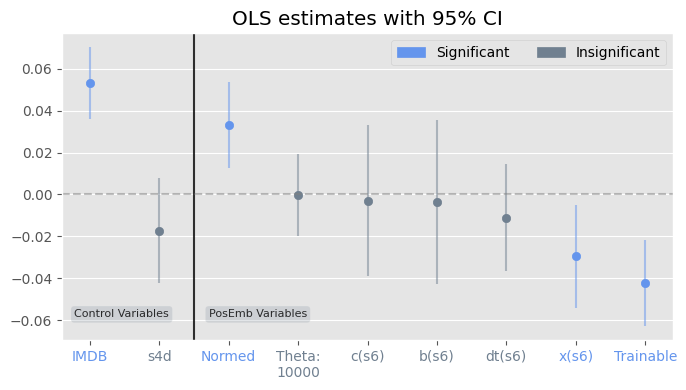

In [14]:

num_vars = len(fit.params[1:])


params_ = np.array(fit.params[1:])
if no_pos_:
   all_vars_ = np.array(["s4d", "Theta:\n10000", "Normed", "Trainable", "b(s6)", "c(s6)", "dt(s6)", "x(s6)","IMDB"])
else:
   all_vars_ = np.array(["s4d", "Theta:\n10000", "Normed", "Trainable", "b(s6)", "c(s6)", "dt(s6)", "x(s6)", "NoPos","IMDB"])#np.array(all_vars[:-1])
not_pos_vars_idx = [0,len(params_)-1]
tmp = ((0,not_pos_vars_idx), 
       (len(not_pos_vars_idx), [idx for idx in list(range(len(params_))) if idx not in not_pos_vars_idx]))
plt.figure(figsize=(7,4))    
#xtick_idx = []
colors = [] 
for off_set, range_ in tmp:
   print(range_)
   print("old names", all_vars)
   print("new names",all_vars_)
   se_ = np.array(fit.bse[1:])[range_]
   sorted_args = np.argsort(params_[range_])[::-1]
   # print(sorted_args)
   # print(params_)
   
   params = params_[range_][sorted_args]
   se = se_[sorted_args]
   all_var_names = all_vars_[range_][sorted_args]
   
   
   ax = plt.subplot(111)
   for i in range(len(range_)):
      if ((params[i]-1.96*se[i] < 0) and  (params[i]+1.96*se[i] < 0))  or ((params[i]-1.96*se[i] > 0) and  (params[i]+1.96*se[i] > 0)):
         color="cornflowerblue"
         alpha=1.
      else:
         color="slategray"
         alpha=0.6
      colors.append(color)
      #xtick_idx.append(i+off_set)
      plt.scatter(i+off_set, params[i], color=color)
      plt.vlines(i+off_set, params[i]-1.96*se[i], params[i]+1.96*se[i], color=color, alpha=0.5)

plt.xticks(range(num_vars), np.concatenate((np.array(["IMDB", "s4d"]), all_var_names)))
xticks = [tick for tick in ax.get_xticklabels()]

for ax_, color in zip(ax.get_xticklabels(), colors):
    ax_.set_color(color)

import matplotlib.patches as mpatches
red_patch = [
           mpatches.Patch(color='cornflowerblue', label='Significant'),
           mpatches.Patch(color='slategray', label='Insignificant'),
          ]

plt.legend(handles=red_patch, ncol=2)

plt.axvline(1.5,color="black", alpha=0.8)
plt.axhline(0, color="gray", alpha=0.5, linestyle="--")
plt.grid(axis="x")
plt.title("OLS estimates with 95% CI")
plt.tight_layout()

props = dict(boxstyle='round', facecolor='slategray', alpha=0.2)
ctr_vars = "Control Variables"
ax.text(0.02, 0.1, ctr_vars, transform=ax.transAxes, fontsize=8,color="black", alpha=0.8,
        verticalalignment='top', bbox=props)
indent = 0.22
ctr_vars = "PosEmb Variables"
if no_pos_:
   indent+=0.02
ax.text(indent,0.1, ctr_vars, transform=ax.transAxes, fontsize=8, color="black", alpha=0.8,
        verticalalignment='top', bbox=props)


plt.savefig(f"data/exp2/ols_coef_ci_pos_emb.png", dpi=200)


In [15]:
all_vars__ = np.array(["s4d", "10000", "Norm", "Train", "b", "c", "dt", "x", "NoPos", "IMDB", "Acc"])
df = np.vstack((np.array(all_vars__), 
                imdb_ols_data.sum(axis=0).astype(int), 
                cifar10_ols_data.sum(axis=0).astype(int),
                combined.sum(axis=0).astype(int), 
                combined.mean(axis=0).round(3))) 
df

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 11 and the array at index 3 has size 10

In [ ]:
df[1,-1] = imdb_ols_data.mean(axis=0).round(3)[-1]
df[2,-1] = cifar10_ols_data.mean(axis=0).round(3)[-1]
df[3,-1] = None
df